### importando librerias

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### funcion escala grises ponderado para pasar imagen a color a escala de grises

In [20]:
def escalaGrisPonderado(img):
    """Convierte una imagen a escala de grises utilizando la ponderación estándar."""
    gris = np.zeros_like(img, dtype=np.uint8)[:, :, 0]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            gris[i, j] = int(0.299*pixel[0] + 0.587*pixel[1] + 0.11*pixel[2])
    return gris

### funcion binarizar imagen hecha en el problema 1

In [21]:
#se uso el metodo otsu fijo ya que el busca el mejor umbral
def binarizar_imagen(imagen):
    
    #aqui si la imgen no viene en escala de grises la combierte
    if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
   
    umbral, img_bin = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return img_bin

Función para igualar tamaño de imagenes, ya que para las operaciones deben ser del mismo tamaño,
se decidio poner las imagnes al tamaño de la mas pequeña recibida

In [22]:
def igualar_tamano_imagenes(imagen1, imagen2):
    # Obtener el tamaño de las imágenes recibidas
    alto1, ancho1, _ = imagen1.shape
    alto2, ancho2, _ = imagen2.shape

    # tamaño mínimo para alto y ancho
    ancho_min = min(ancho1, ancho2)
    alto_min = min(alto1, alto2)

    # ajustar las imagenes
    imagen1_ajustada = imagen1[:alto_min, :ancho_min]
    imagen2_ajustada = imagen2[:alto_min, :ancho_min]

    return imagen1_ajustada, imagen2_ajustada

### funcion que hace las 5 operaciones suma, resta, and, or y xor

In [23]:
import cv2
import numpy as np

def operaciones_imagenes(imagen1, imagen2, umbral=128):
    
    # por cualquier cosa verificamos que las imagenes sean inguales y no nos de error del sistema
    if imagen1.shape != imagen2.shape:
        raise ValueError("Las imágenes no son del mismo tamaño.")
    
    #convirtiendo las imagenes a escala de grises ponderadas
    img_gris1 = escalaGrisPonderado(imagen1)
    img_gris2 = escalaGrisPonderado(imagen2)
    #binarizando las imagens con la funcion del probleam 1
    img_bin1 = binarizar_imagen(img_gris1)
    img_bin2 = binarizar_imagen(img_gris2)
    
    #imprimiendo imagenes originales en escala de grises
    plt.imshow(img_bin1, cmap='gray')
    plt.title('img_bin1')
    plt.show()

    plt.imshow(img_bin2, cmap='gray')
    plt.title('img_bin2')
    plt.show()

    #ralizando las operaciones 
    suma = cv2.add(img_bin1, img_bin2)
    resta = cv2.subtract(img_bin1, img_bin2)
    and_op = cv2.bitwise_and(img_bin1, img_bin2)
    or_op = cv2.bitwise_or(img_bin1, img_bin2)
    xor_op = cv2.bitwise_xor(img_bin1, img_bin2)
    
    #regresando todas las operaciones
    return {
        "Suma": suma,
        "Resta": resta,
        "AND": and_op,
        "OR": or_op,
        "XOR": xor_op
        
    } 


#probando las funciones

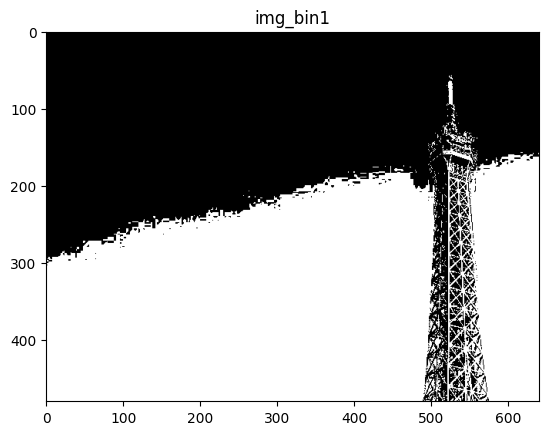

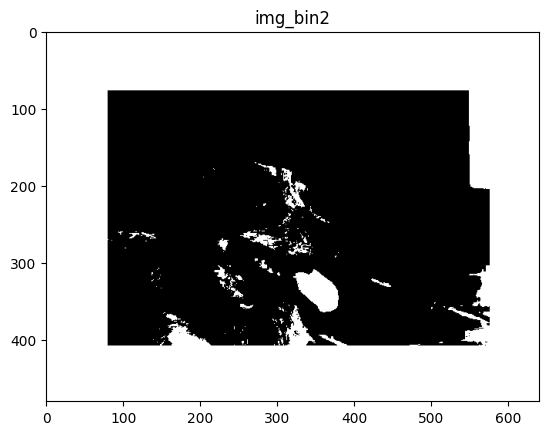

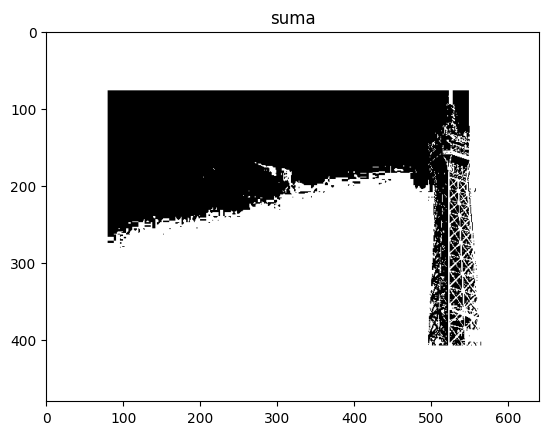

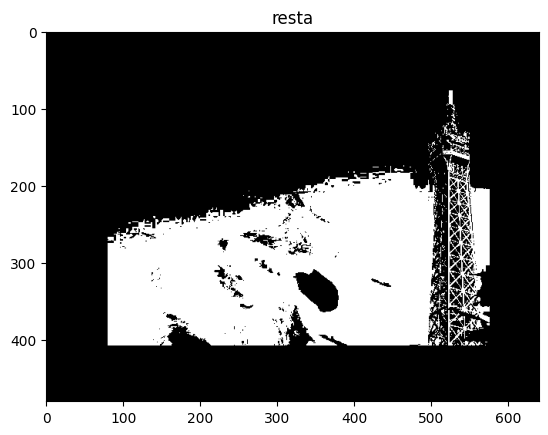

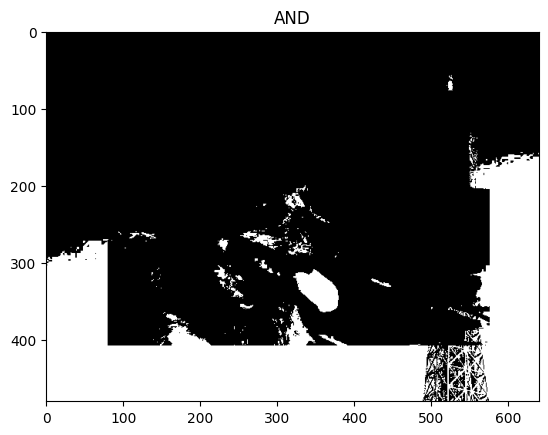

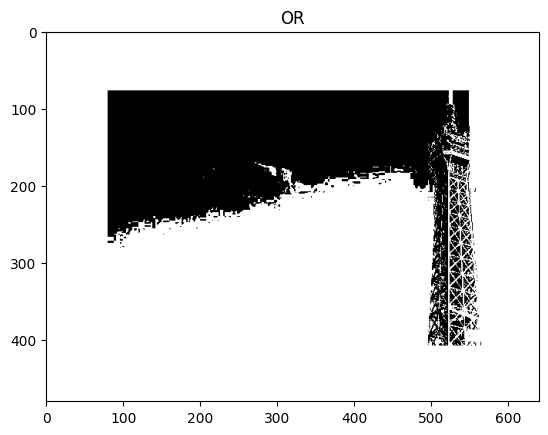

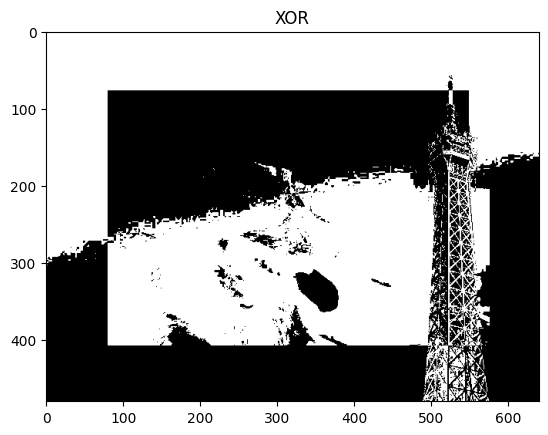

In [24]:

# probando las fucniones
# Cargar las imágenes
imagen1 = cv2.imread('paris.jpg')
imagen2 = cv2.imread('perrocolor.jpg')

#poniendo del mismo tamaño las imagenes
imagen1ajustada, imagen2ajustada=igualar_tamano_imagenes(imagen1,imagen2)

# Realizar las operaciones
resultados = operaciones_imagenes(imagen1ajustada, imagen2ajustada, umbral=128)
#operaciones_imagenes(imagen1ajustada, imagen2ajustada, umbral=128)

# Mostrar los resultados
plt.imshow(resultados['Suma'],cmap='gray')
plt.title('suma')
plt.show()
plt.imshow(resultados['Resta'],cmap='gray')
plt.title('resta')
plt.show()
plt.imshow(resultados['AND'],cmap='gray')
plt.title('AND')
plt.show()
plt.imshow(resultados['OR'],cmap='gray')
plt.title('OR')
plt.show()
plt.imshow(resultados['XOR'],cmap='gray')
plt.title('XOR')
plt.show()